In [1]:
from plot import plot
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import arima
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
def mae(y, y_hat):
    return np.mean(np.abs(y - y_hat))

def mse(y, y_hat):
    return np.mean(np.square(y - y_hat))

def rmse(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))

def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat) / y) * 100)

In [3]:
n_malwares = 'more_malwares'
provider = 'lago'
data_length = 'data_two_years/malwares_Out_2019_to_Out_2021_'
series_goal = 'training'

In [4]:
series = pd.read_csv(f'./{n_malwares}/{provider}/{data_length}{series_goal}.csv')
series.columns = [series.columns[0], 'week', *series.columns[2:]]
series.head()

,qtde,week
0,24,0
1,22,1
2,18,2
3,30,3
4,18,4


In [5]:
prediction_series = np.array(series['qtde'])

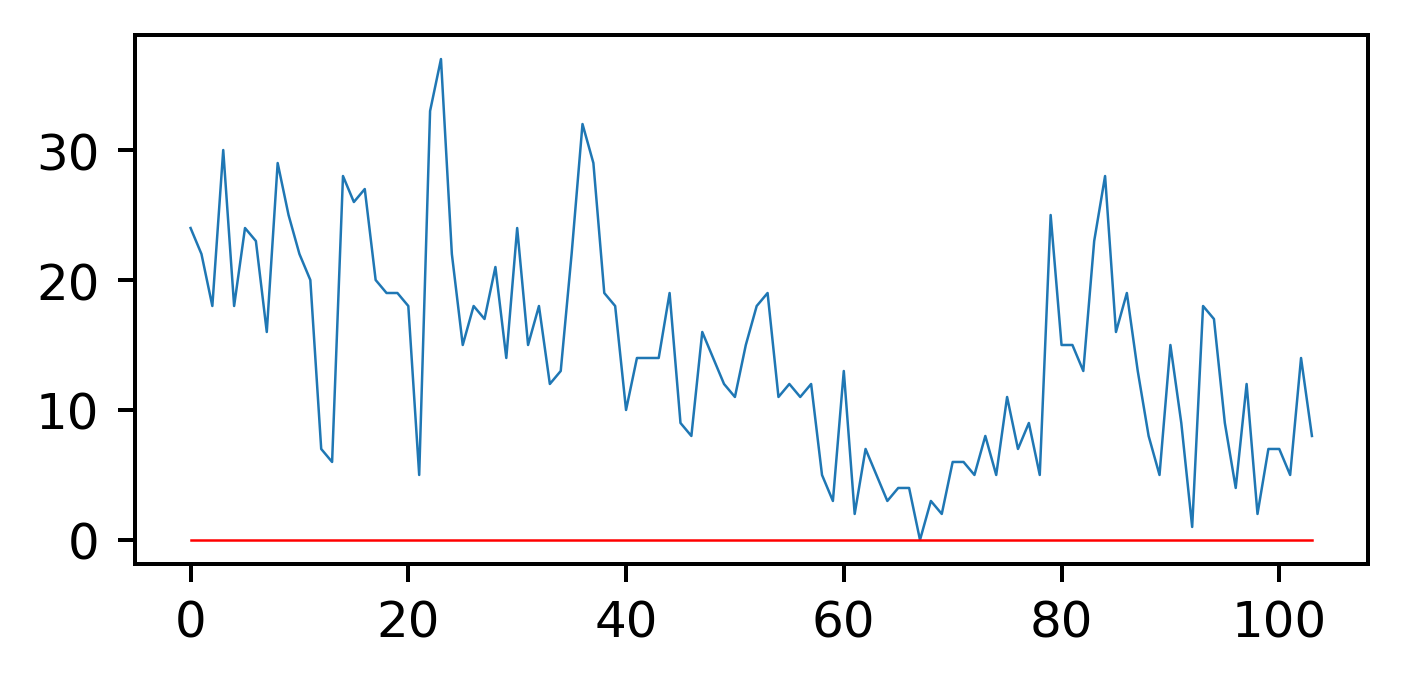

In [6]:
plot(prediction_series, sec_plots=[[0 for i in range(len(prediction_series))]])

In [7]:
def divide_xy(series, lag=4):
  x = []
  y = []
  for i in series[:lag]:
    x.append(series[i:i+lag])
    y.append(series[i+4])
  return x, y

In [8]:
# x, y = divide_xy(prediction_series, lag=4)
models = arima.auto_arima(prediction_series, return_valid_fits=True)
models
# arima_model = ARIMA(x, order=(1,0,0)).fit()

(ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(1, 1, 3), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(2, 1, 2), scoring_ar

C:\Users\Usuario\AppData\Local\Temp/ipykernel_28180/2952424981.py:11: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y - y_hat) / y) * 100)


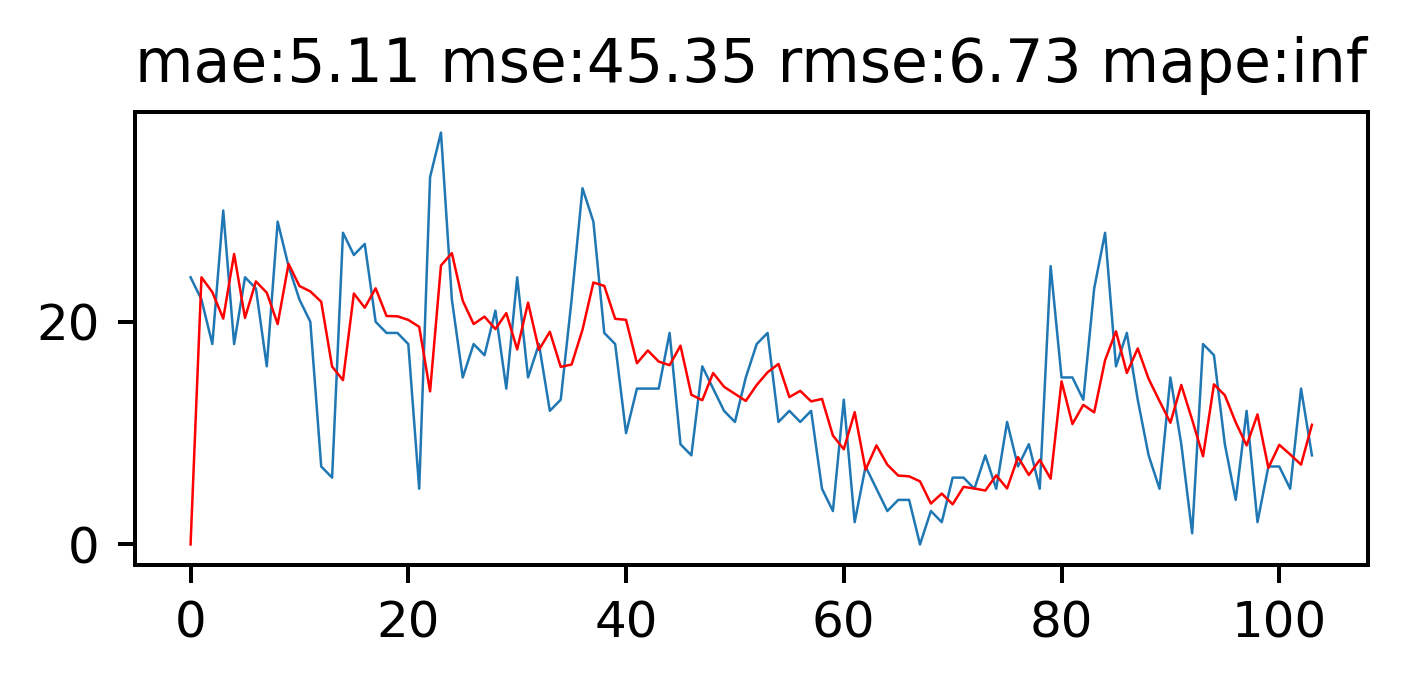

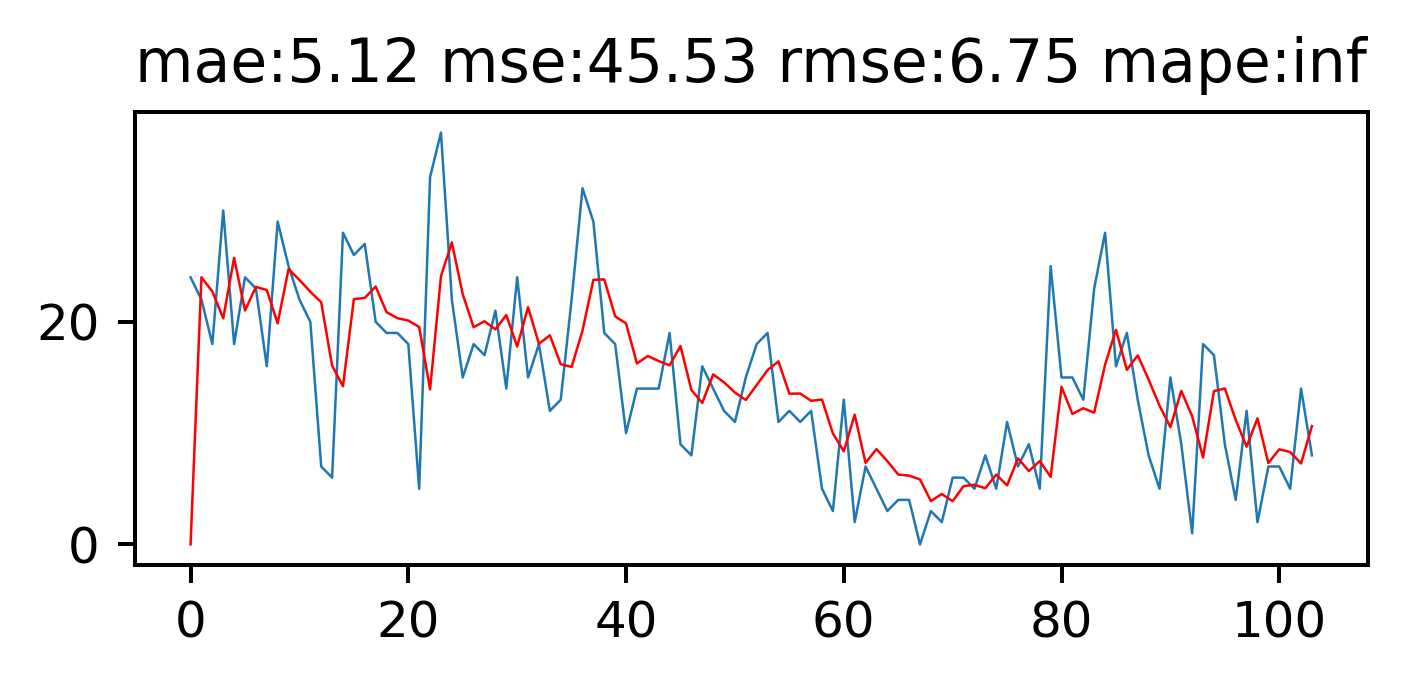

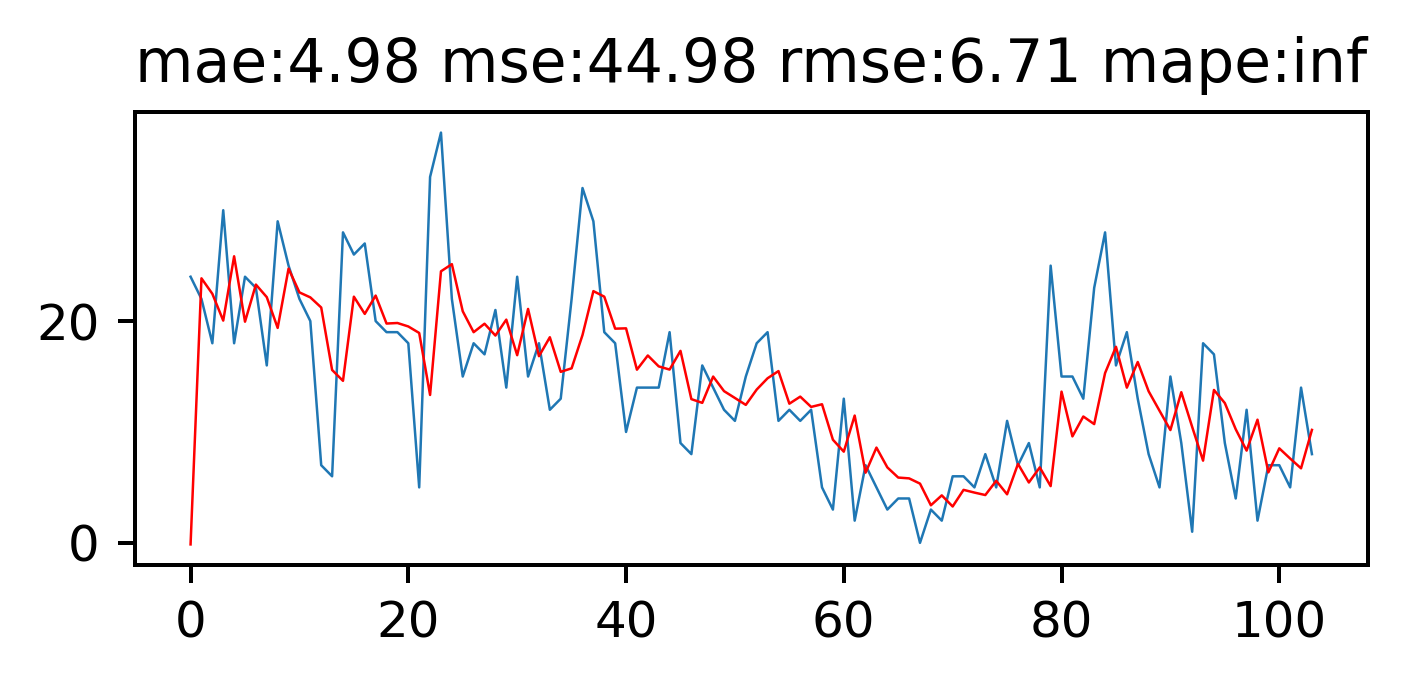

In [9]:
for model in models[:3]:
	predictions = model.predict_in_sample()
	plot(prediction_series, sec_plots=[predictions], title=f'mae:{mae(prediction_series, predictions):.2f} mse:{mse(prediction_series, predictions):.2f} rmse:{rmse(prediction_series, predictions):.2f} mape:{mape(prediction_series, predictions):.2f}')

In [10]:
data_length = 'data_two_years/malwares_Out_2021_to_Out_2022_'
series_goal = 'test'

In [11]:
test = pd.read_csv(f'./{n_malwares}/{provider}/{data_length}{series_goal}.csv')
test.columns = [test.columns[0], 'week', *test.columns[2:]]
test.head()

,qtde,week,Média
0,9,0,"21,5192307692308"
1,8,1,NaN
2,8,2,NaN
3,9,3,NaN
4,16,4,NaN


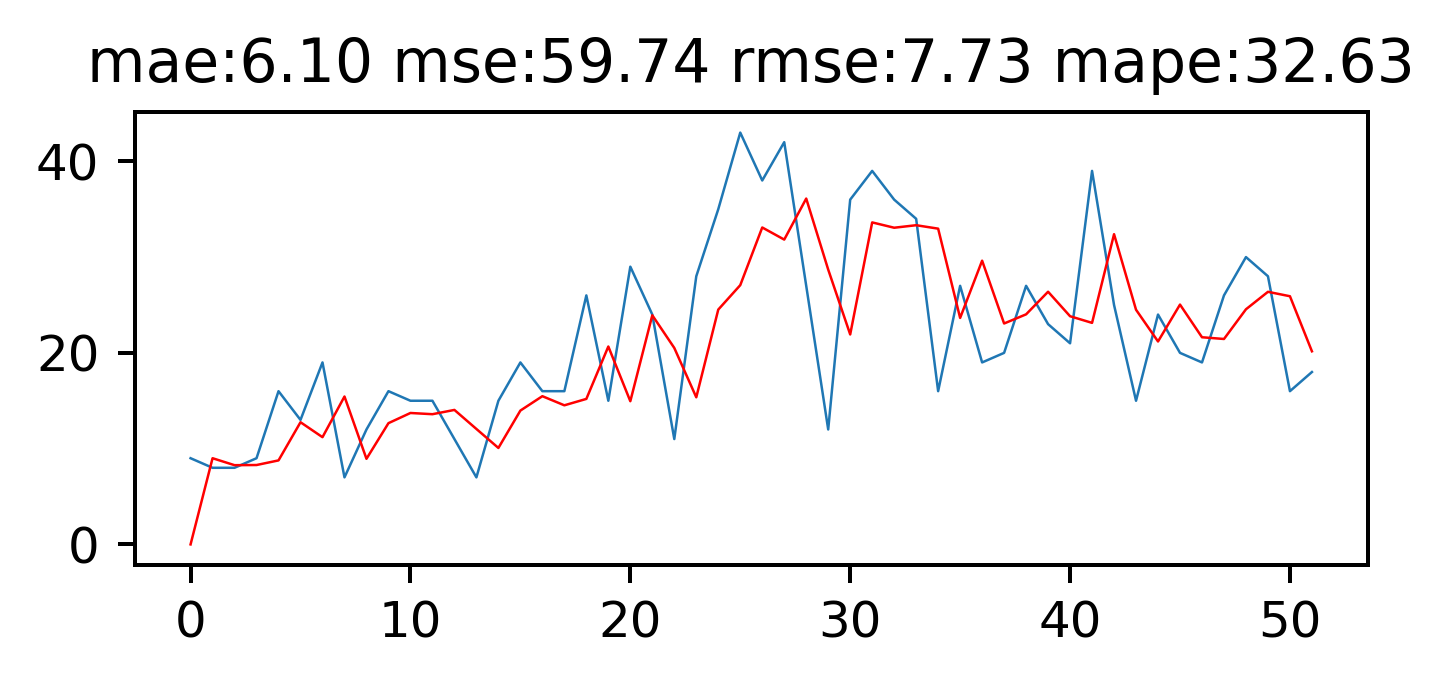

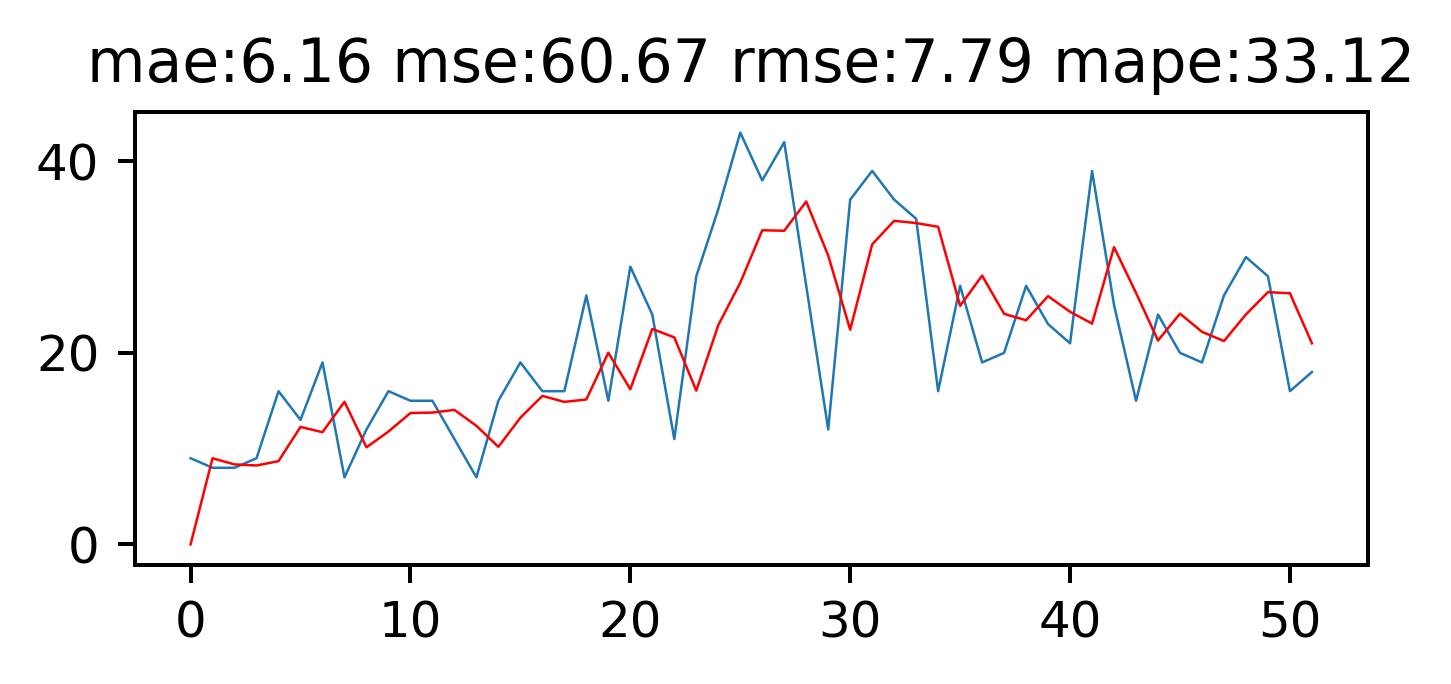

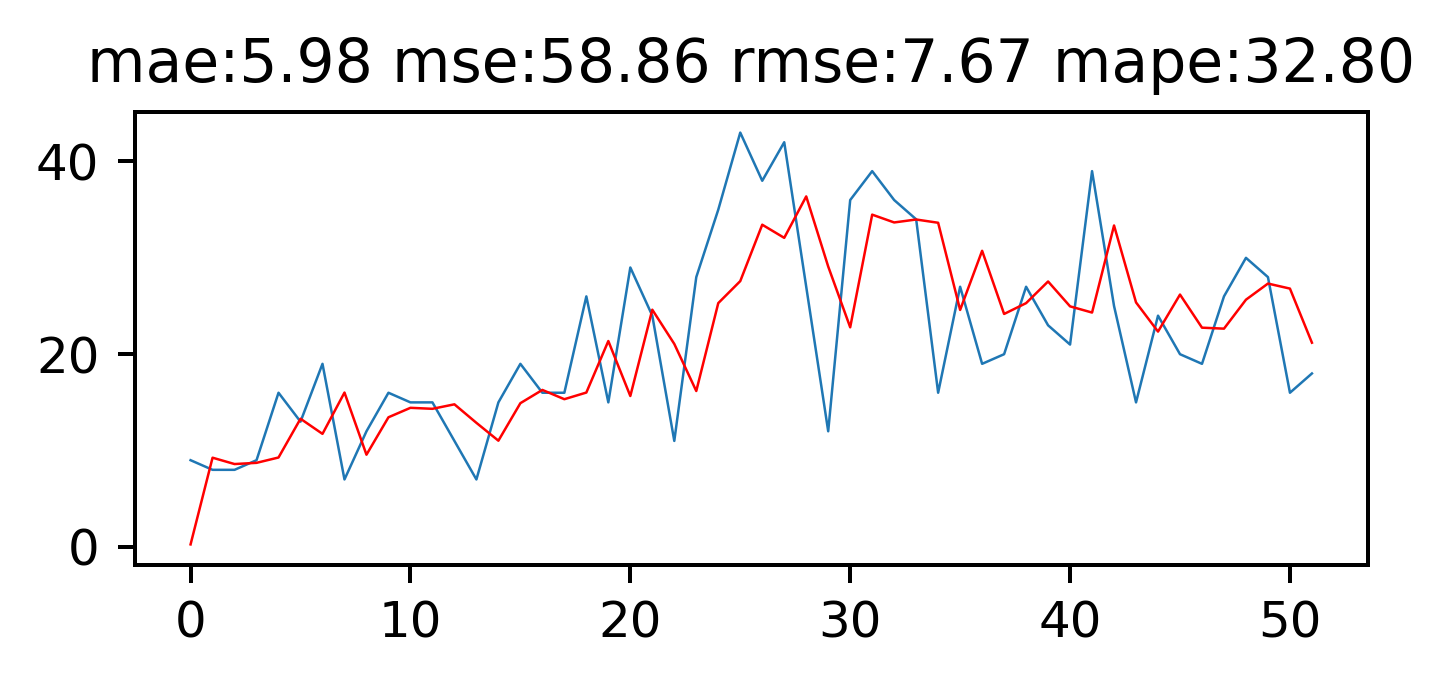

In [12]:
for model in models[:3]:
  model.fit(test['qtde'])
  predictions = model.predict_in_sample()
  plot(test['qtde'], sec_plots=[predictions], title=f'mae:{mae(test["qtde"], predictions):.2f} mse:{mse(test["qtde"], predictions):.2f} rmse:{rmse(test["qtde"], predictions):.2f} mape:{mape(test["qtde"], predictions):.2f}')